# LSTM  para predecir a los pasajeros de las aerolíneas internacionales

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Bidirectional 
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# convertimos un array de valores en una matriz de conjuntos de datos
Con esto tenemos la salida a n muestras siguientes

In [2]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
    x = dataset.iloc[0:-look_back].values
    y = dataset.iloc[look_back::,0].values
    return numpy.array(x), numpy.array(y)

# Se define una semilla constante para controlar la estabilidad del modelo.
Con esto se garantiza que el modelo se entrene siempre con la misma secuencia de numeros aleatorios.

In [3]:
numpy.random.seed(5)

# cargamos el conjunto de datos

dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.shape

In [16]:
dataframe = pd.read_csv('ajustado.csv', parse_dates=True,index_col=0)
dataset = dataframe.iloc[:,2:3].values
dataset = dataset.astype('float32')
dataset.shape

FileNotFoundError: File b'ajustado.csv' does not exist

In [5]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# dividimos entre entranmiento y test
import pandas as pd
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = pd.DataFrame(dataset[0:train_size,:]), pd.DataFrame(dataset[train_size:len(dataset),:])
print(len(train), len(test))

2769 1364


In [7]:
# remodelamos X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#creamos la LSTM network

model = Sequential()
model.add(Bidirectional(LSTM(4, input_shape=(1, look_back))))
model.add(Dense(1))
# evaluar la exactitud de las predicciones de un modelo a través del error de la raíz cuadrada de la media (RMSE)
# El error de entrenamiento mide qué tan bien ajusta los datos de entrenamiento tu modelo
#El error cuadrático medio (MSE) puede ser difícil de interpretar; es por esto que generalmente observamos el error 
# de la raíz cuadrada de la media (RMSE) en su lugar. Una propiedad interesante del RMSE es que se puede interpretar 
# en la misma escala que los objetivos originales
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 7s - loss: 0.0135
Epoch 2/100
 - 6s - loss: 5.7968e-05
Epoch 3/100
 - 6s - loss: 6.5337e-05
Epoch 4/100
 - 6s - loss: 6.7579e-05
Epoch 5/100
 - 6s - loss: 6.7963e-05
Epoch 6/100
 - 6s - loss: 6.7875e-05
Epoch 7/100
 - 6s - loss: 6.7469e-05
Epoch 8/100
 - 6s - loss: 6.6195e-05
Epoch 9/100
 - 6s - loss: 6.6002e-05
Epoch 10/100
 - 7s - loss: 6.5239e-05
Epoch 11/100
 - 6s - loss: 6.4877e-05
Epoch 12/100
 - 6s - loss: 6.4361e-05
Epoch 13/100
 - 6s - loss: 6.5846e-05
Epoch 14/100
 - 6s - loss: 6.4642e-05
Epoch 15/100
 - 7s - loss: 6.3082e-05
Epoch 16/100
 - 6s - loss: 6.4957e-05
Epoch 17/100
 - 6s - loss: 6.4670e-05
Epoch 18/100
 - 6s - loss: 6.4946e-05
Epoch 19/100
 - 7s - loss: 6.5422e-05
Epoch 20/100
 - 6s - loss: 6.4299e-05
Epoch 21/100
 - 6s - loss: 6.4382e-05
Epoch 22/100
 - 6s - loss: 6.4219e-05
Epoch 23/100
 - 6s - loss: 6.5505e-05
Epoch 24/100
 - 7s - loss: 6.4297e-05
Epoch 25/100
 - 6s - loss: 6.3308e-05
Epoch 26/100
 - 6s - loss: 6.4516e-05
Epoch 27/100
 - 6s - loss

In [9]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [10]:
# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [11]:
# calculamos el error rms
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Resultado del test: %.2f RMSE' % (testScore))

Resultado del entrenamiento: 0.68 RMSE
Resultado del test: 0.66 RMSE


In [12]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [13]:
# predicciones del test de cambio para plotear
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back)+1:len(dataset), :] = testPredict

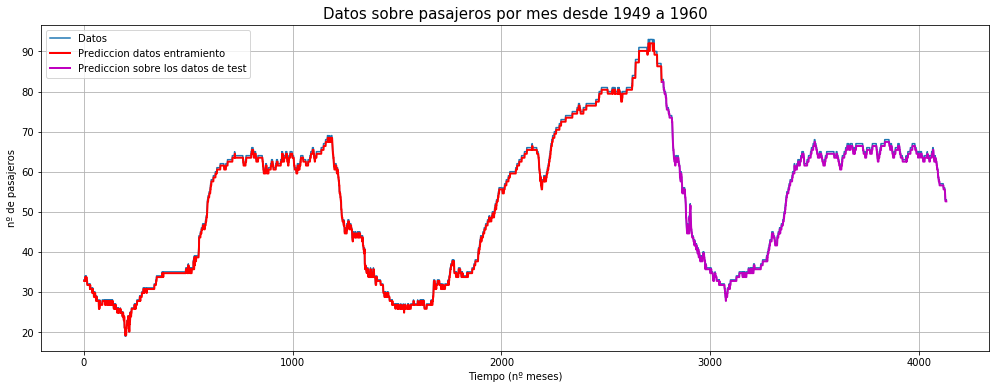

In [14]:
plt.figure(figsize=(17,6))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Datos sobre pasajeros por mes desde 1949 a 1960", fontsize = 15)
plt.xlabel("Tiempo (nº meses)", fontsize = 10)
plt.ylabel("nº de pasajeros", fontsize = 10)
plt.show()

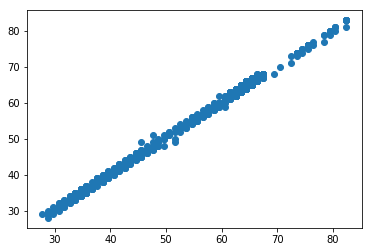

In [15]:
plt.scatter(testPredict,testY)

Resultado del entrenamiento: 23.34 RMSE
Resultado del test: 47.56 RMSE

- bidireccional:
Resultado del entrenamiento: 22.85 RMSE
Resultado del test: 48.85 RMSE
